In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avarage_salary,company_text,job_states,same_state,age,python_req,r_req,spark_req,excel_req
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,KnowBe4\n,FL,1,12,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,PNNL\n,WA,1,57,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,1


In [4]:
print(df.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age',
       'python_req', 'r_req', 'spark_req', 'excel_req'],
      dtype='object')


In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df["job_simplified"]= df["Job Title"].apply(title_simplifier)
df["job_simplified"].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplified, dtype: int64

In [7]:
df["seniority"]= df["Job Title"].apply(seniority)
df["seniority"].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
df['job_states']= df["job_states"].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df["job_states"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_states, dtype: int64

In [9]:
df["job_des_len"]= df["Job Description"].apply(lambda x: len(x))
df["job_des_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: job_des_len, Length: 742, dtype: int64

In [10]:
df["no_of_competitiors"]= df["Competitors"].apply(lambda x: len(x.split(",")) if x!= '-1' else 0)
df["no_of_competitiors"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: no_of_competitiors, Length: 742, dtype: int64

In [11]:
df['hourly']

0      0
1      0
2      0
3      0
4      0
      ..
737    0
738    0
739    0
740    0
741    0
Name: hourly, Length: 742, dtype: int64

In [12]:
df["min_salary"]= df.apply(lambda x: x["min_salary"]*2 if x["hourly"]== 1 else x["min_salary"], axis=1)

In [13]:
df["max_salary"]= df.apply(lambda x: x["max_salary"]*2 if x["hourly"]== 1 else x["max_salary"], axis=1)

In [14]:
df.loc[df["hourly"]==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
df["company_text"]= df["company_text"].apply(lambda x: x.replace("\n", ""))

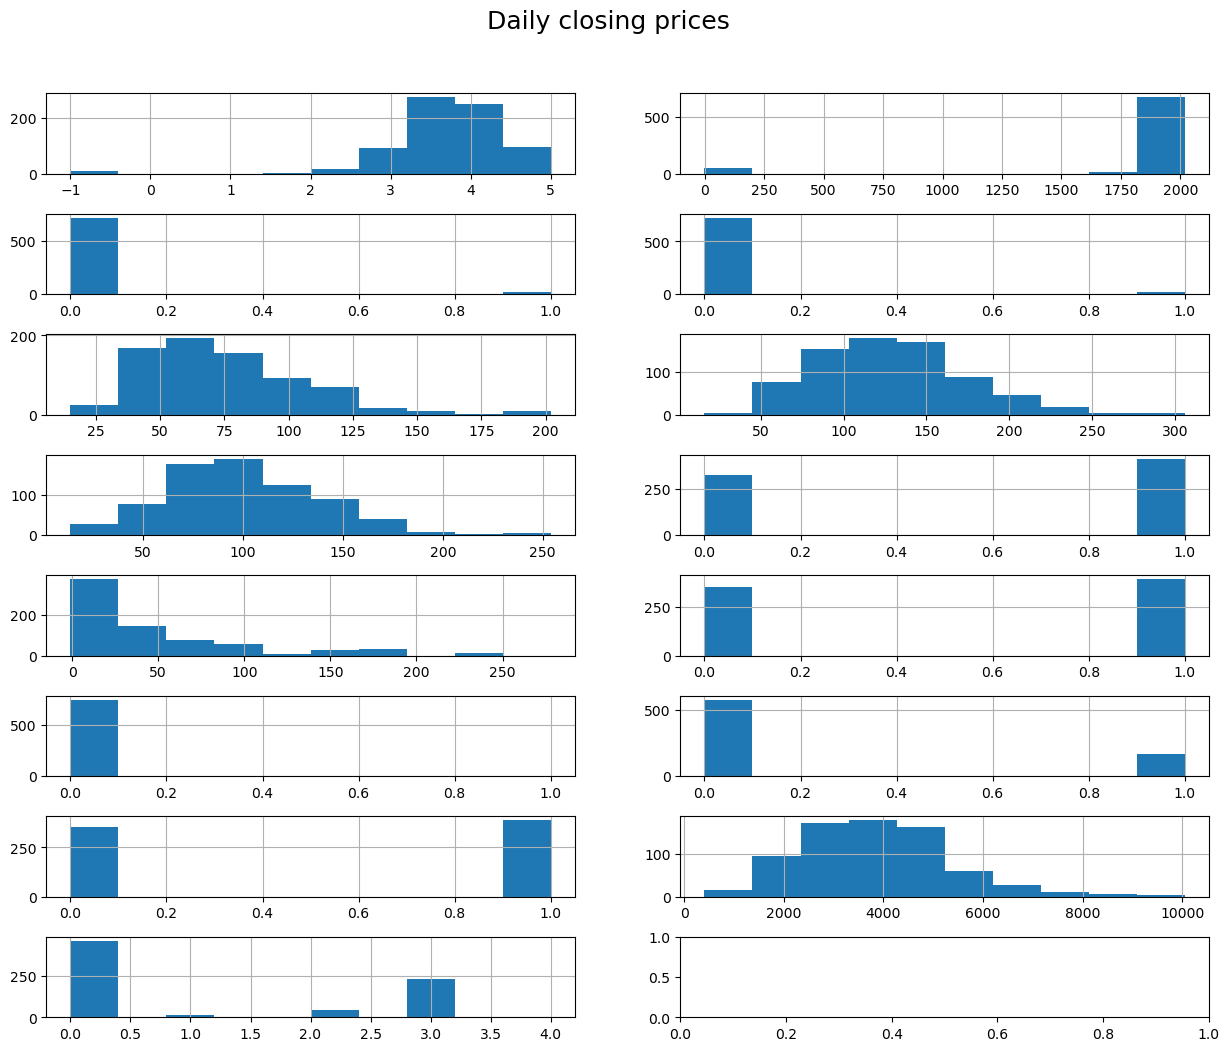

In [16]:
fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)
n=1

for col in df.columns:
    if(df[col].dtype== 'object'):
        continue

    ax = plt.subplot(8, 2, n)
    # print(col, '->',df[col].dtype)
    # plt.figure()
    df[col].hist(ax=ax)
    n=n+1
    # plt.show()

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age',
       'python_req', 'r_req', 'spark_req', 'excel_req', 'job_simplified',
       'seniority', 'job_des_len', 'no_of_competitiors'],
      dtype='object')

/var/folders/j3/p96cvf3n2kj8wkqchht_g4980000gn/T/ipykernel_22864/4229397153.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr())


<AxesSubplot: >

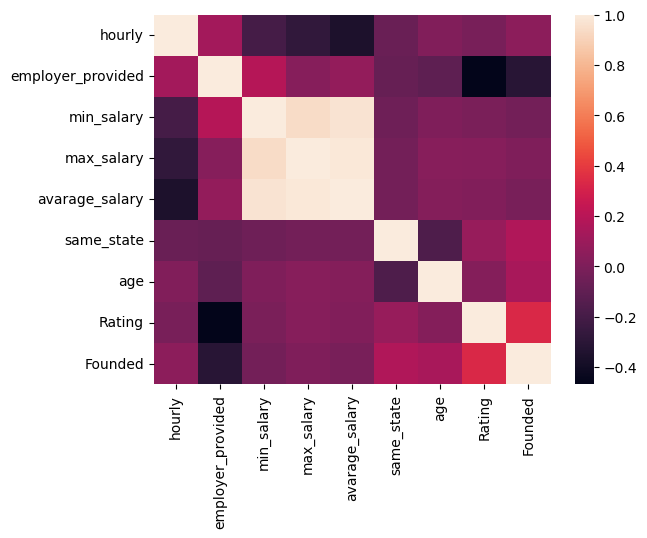

In [18]:
df_correlation= df[['hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age','Rating', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue', 'Competitors',]]
sns.heatmap(df_correlation.corr())

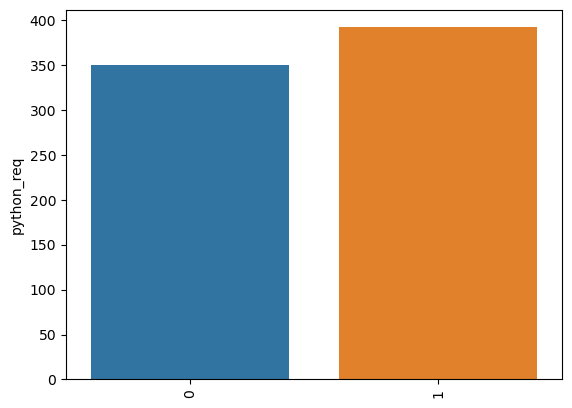

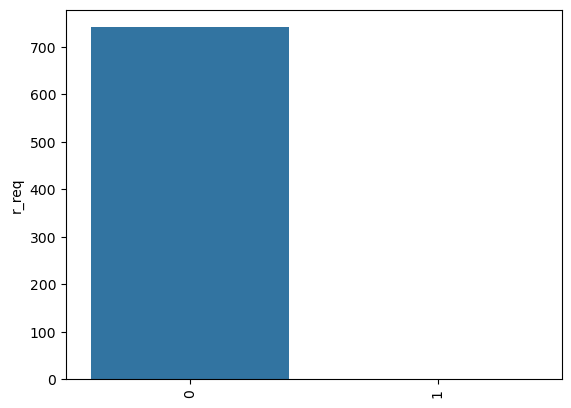

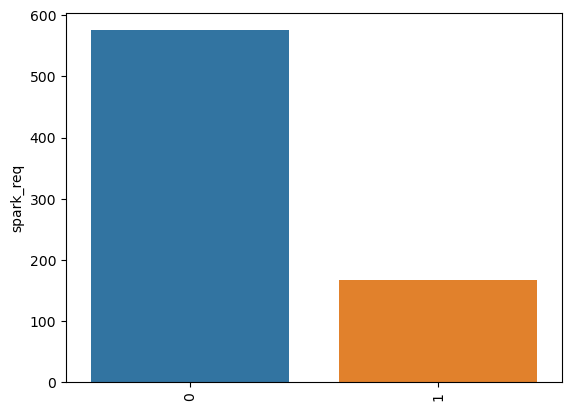

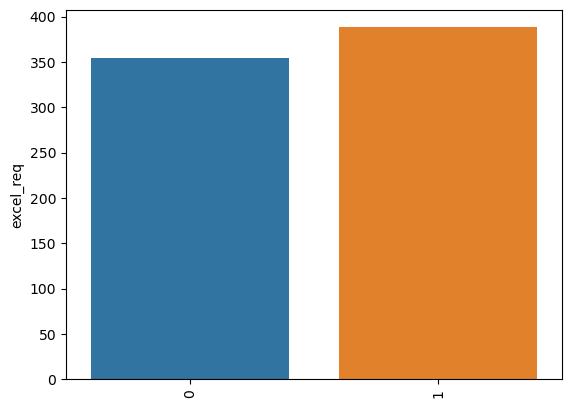

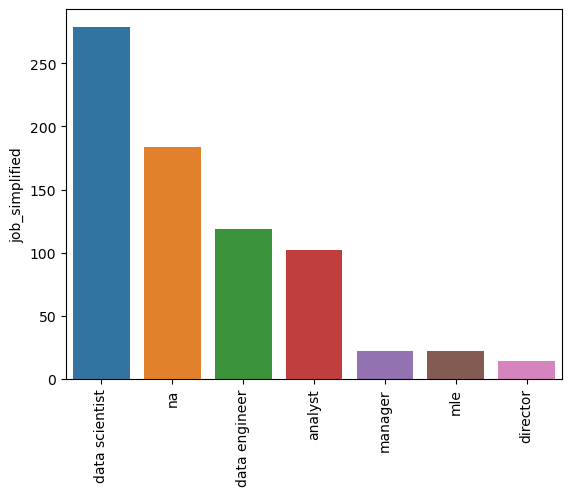

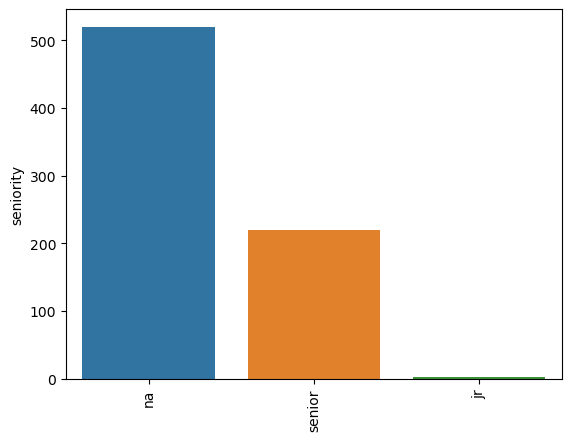

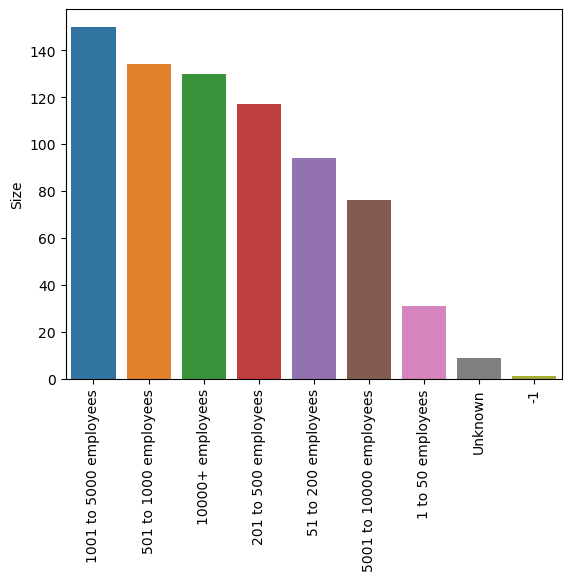

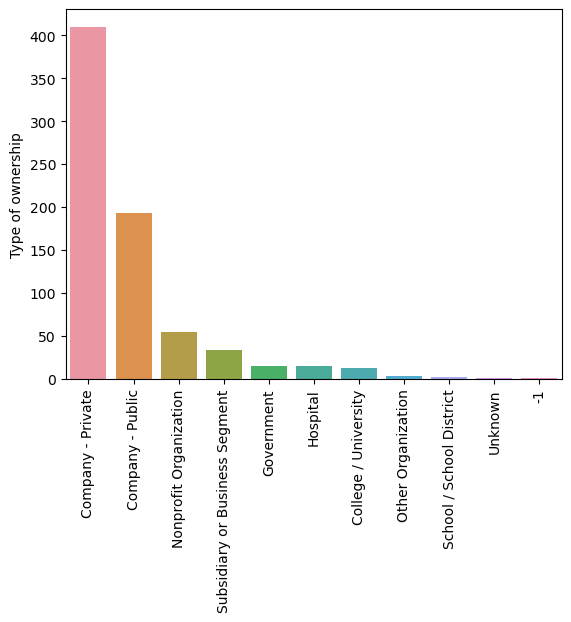

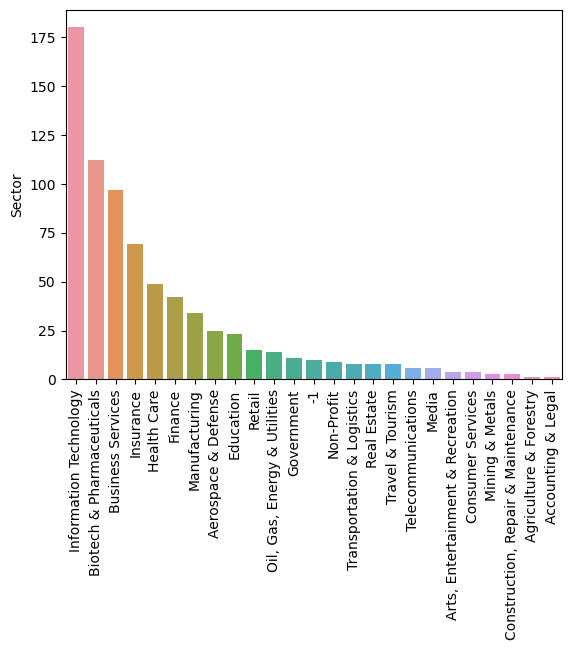

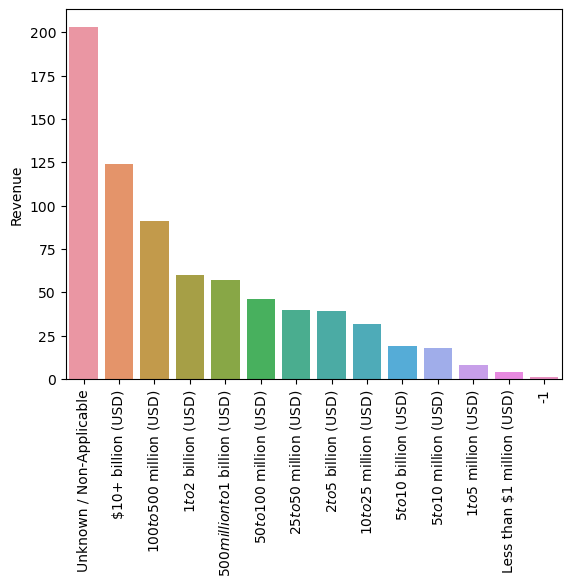

In [19]:
df_bars= df[['age','python_req', 'r_req', 'spark_req', 'excel_req', 'job_simplified','seniority','Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',]]
for df_bar in df_bars:
    cat_num= df_bars[df_bar].value_counts()
    if(len(cat_num)>50):
        continue
    sns.barplot(x= cat_num.index, y= cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age',
       'python_req', 'r_req', 'spark_req', 'excel_req', 'job_simplified',
       'seniority', 'job_des_len', 'no_of_competitiors'],
      dtype='object')

In [21]:
pd.pivot_table(df, index= 'job_simplified', values='avarage_salary')

,avarage_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [22]:
pd.pivot_table(df, index= ['job_simplified', 'seniority'], values='avarage_salary')

avarage_salary
job_simplified seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [23]:
# pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

pd.pivot_table(df, index= ['job_states', 'job_simplified'], values='avarage_salary', aggfunc='count').sort_values('job_states', ascending= False)

avarage_salary
job_states job_simplified                
WI         na                           4
           data scientist               3
           analyst                      3
WA         na                           1
           data scientist              17
           analyst                      3
VA         na                           5
           mle                          2
           data scientist              18
           data engineer               10
           analyst                      6
UT         data engineer                3
           analyst                      4
           data scientist               3
TX         na                           7
           data scientist              13
           data engineer                8
TN         data scientist               1
           data engineer               10
           analyst                      2
SC         na                           1
RI         analyst                      1
PA         manager                      3
           data engineer                1
           data scientist               6
           analyst                      8
           mle                          7
           na                           8
OR         data scientist               3
           data engineer                1
OH         na                           3
           data scientist               7
           analyst                      4
NY         na                          12
           mle                          2
           data scientist              40
           data engineer                4
           analyst                     14
NM         data scientist               3
NJ         data scientist               4
           analyst                      6
           data engineer                2
           manager                      2
           director                     2
           na                           1
NE         na                           4
NC         na                          12
           data scientist               3
           data engineer                6
MO         na                           3
           manager                      1
           data scientist               3
           analyst                      2
MN         data engineer                1
           analyst                      1
MI         manager                      2
           data scientist               4
MD         na                          16
           data scientist              13
           data engineer                3
           analyst                      3
MA         na                          46
           manager                      5
           director                     6
           data scientist              30
           data engineer               12
           analyst                      4
LA         analyst                      1
           data engineer                2
           na                           1
KY         na                           4
           data scientist               2
KS         mle                          3
IN         na                           4
           data scientist               2
           data engineer                4
IL         analyst                      3
           na                           6
           mle                          2
           director                     6
           data scientist              15
           data engineer                8
ID         analyst                      2
IA         analyst                      2
           data engineer                3
GA         data scientist               3
           na                           3
FL         data scientist               7
           data engineer                3
           analyst                      6
DE         na                           6
DC         data scientist               5
           data engineer                4
           analyst                   

In [26]:
df.loc[df['job_simplified']== 'data scientist'].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_req,r_req,spark_req,excel_req,job_simplified,seniority,job_des_len,no_of_competitiors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,49,1,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,38,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,12,1,0,1,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,57,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,24,1,0,0,1,data scientist,na,2728,3


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_text', 'job_states', 'same_state', 'age',
       'python_req', 'r_req', 'spark_req', 'excel_req', 'job_simplified',
       'seniority', 'job_des_len', 'no_of_competitiors'],
      dtype='object')

In [28]:
df_pivots= df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly',  'python_req', 'r_req', 'spark_req', 'excel_req','no_of_competitiors']]

In [40]:
pd.set_option('display.max_rows', 10)  
for i in df_pivots.columns:
    # print(i)
    print(pd.pivot_table(df, index=i, values='avarage_salary').sort_values('avarage_salary', ascending=False))

        avarage_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
...                ...
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286

[31 rows x 1 columns]
                                          avarage_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.000000
Financial Analytics & Research                145.125000
Health, Beauty, & Fitness                     139.500000
Telecommunications Services                   131.500000
...                                                  ...
Architectural & Engineering Services           50.500000
Gambling                                       48.500000
Social Assistance                              48.166667
Telecommunications Manufacturing               44.0

In [42]:
pd.pivot_table(df, index='Revenue', columns='python_req', values="avarage_salary", aggfunc='count')

python_req,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
...,...,...
$50 to $100 million (USD),21.0,25.0
$500 million to $1 billion (USD),29.0,28.0
-1,1.0,NaN
